# Introduction


In the notebook 'determining_redshift', the sample was small (1500 sources) and it contained only very bright (mean 17 in magnitude in the dered_r band) sources. The new dataset contains 135000 sources with a mean of 19 in magnitudes.

To note that SDSS removed their photozRF table because it does poorly with the faint red galaxies targeted in  Baryon Oscillation Spectroscopic Survey (BOSS). 

In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import table
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()
%matplotlib inline

## Loading data and some EDA

In [2]:
filepath= "/home/veroastro/Documents/spectraTypes/data/newData/"
data = pd.read_csv(filepath+"full_sources.csv")


In [3]:

#Scramble the data set so that it is not ordered by spectral class (QSO, galaxy or star) 
data = data.sample(frac=1)

data.head()

,objID,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,class,subClass,type
74661,1237671140946673797,18.70755,0.018987,18.58827,0.008115,18.30832,0.007775,18.03629,0.007845,17.61891,0.014817,9.470003e+17,0.391421,0.000128,0.274903,0.062726,QSO,BROADLINE,3.0
52108,1237666407380091059,21.86515,0.302100,20.95020,0.051835,20.14202,0.036993,19.27346,0.025795,19.14456,0.077907,7.858861e+17,0.599028,0.000055,0.630623,0.069566,QSO,BROADLINE,3.0
26404,1237648720139518093,24.61275,2.121920,20.75031,0.073134,18.84521,0.018786,18.19994,0.015492,17.85910,0.042086,5.337555e+17,0.321955,0.000110,0.370356,0.026022,GALAXY,NaN,NaN
102845,1237667430633570409,22.41891,0.289416,19.70115,0.014923,18.25798,0.008024,17.35775,0.006623,16.81206,0.013416,2.584074e+18,0.000116,0.000015,0.192390,0.129783,STAR,M2,3.0
63411,1237657400803721249,21.22128,0.159223,20.43307,0.031508,20.28084,0.037875,19.69734,0.029186,19.54530,0.082307,9.311591e+17,0.644905,0.000182,0.375111,0.172950,QSO,NaN,3.0


In [4]:
data.describe()

,objID,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,err_z,specObjID,z,zErr,photoZ,photoErr,type
count,1.350000e+05,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,1.350000e+05,135000.000000,135000.000000,135000.000000,135000.000000,90000.0
mean,1.237659e+18,21.818135,0.564492,20.309045,0.109368,19.285139,0.078141,18.592777,0.050795,18.275074,0.108812,2.667961e+18,0.293436,0.069791,-429.592481,-429.903597,3.0
std,7.359006e+12,2.191509,0.923682,1.830998,0.529150,1.673204,0.502919,1.488666,0.377803,1.500261,0.494538,2.338664e+18,0.498651,2.411561,2028.452859,2028.386901,0.0
min,1.237646e+18,10.332040,0.000597,9.884518,0.000282,9.321852,0.000305,9.207663,0.000210,9.800303,0.001093,2.994897e+17,-0.009944,-6.000000,-9999.000000,-9999.000000,3.0
25%,1.237652e+18,20.000940,0.065125,18.970020,0.012477,18.255080,0.010109,17.759570,0.010070,17.433850,0.024752,5.438980e+17,0.000095,0.000026,0.172001,0.023691,3.0
50%,1.237658e+18,21.933740,0.321909,20.637290,0.047026,19.579080,0.025417,18.846650,0.021037,18.440160,0.051082,1.691149e+18,0.188444,0.000051,0.368401,0.040274,3.0
75%,1.237664e+18,23.402515,0.842008,21.611540,0.099981,20.441560,0.050268,19.561500,0.033101,19.151623,0.083175,4.574580e+18,0.431413,0.000095,0.545646,0.065096,3.0
max,1.237680e+18,32.564690,92.837850,31.013640,68.299890,31.521720,29.829040,31.343010,44.447280,30.781270,55.823620,1.030211e+19,7.018627,453.145900,0.999865,0.277625,3.0


photoZ and photoErr have values set as -9999. This is the same as a Null value. Since it is not part of our determination of the redshift, the sources with null values of SDSS photoZ and photoErr wont be deleted from the dataset. Since photoZ and photoErr are needed for comparison, the dataframes photoz and photozErr are created whithout the null values. This leaves us with 129,195 sources of the 135,000


In [5]:

photoz= data.loc[(data['photoZ'] >= 0.0)]['photoZ']
photozErr=data.loc[(data['photoZ'] >= 0.0)]['photoErr']

print('Mean photoError:', round(np.mean(photozErr), 3))

Mean photoError: 0.056


In [6]:
photozErr.describe()

count    129195.000000
mean          0.055803
std           0.044428
min           0.003985
25%           0.025393
50%           0.042296
75%           0.066900
max           0.277625
Name: photoErr, dtype: float64

In [7]:
print('Mean specError:', round(np.mean(data['zErr']), 3))

Mean specError: 0.07


The mean value of the spectroscopic errors is 0.07 while the mean value of the photometric errors is 0.056.

In [8]:

data_clean = data.drop(columns=['specObjID','objID','err_u', 'err_g', 'err_r', 'err_i', 'err_z', 'zErr', 'class', 'subClass', 'photoZ','photoErr','type'])
data_clean.head()

,dered_u,dered_g,dered_r,dered_i,dered_z,z
74661,18.70755,18.58827,18.30832,18.03629,17.61891,0.391421
52108,21.86515,20.95020,20.14202,19.27346,19.14456,0.599028
26404,24.61275,20.75031,18.84521,18.19994,17.85910,0.321955
102845,22.41891,19.70115,18.25798,17.35775,16.81206,0.000116
63411,21.22128,20.43307,20.28084,19.69734,19.54530,0.644905


In [9]:
data_clean.describe()

,dered_u,dered_g,dered_r,dered_i,dered_z,z
count,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000,135000.000000
mean,21.818135,20.309045,19.285139,18.592777,18.275074,0.293436
std,2.191509,1.830998,1.673204,1.488666,1.500261,0.498651
min,10.332040,9.884518,9.321852,9.207663,9.800303,-0.009944
25%,20.000940,18.970020,18.255080,17.759570,17.433850,0.000095
50%,21.933740,20.637290,19.579080,18.846650,18.440160,0.188444
75%,23.402515,21.611540,20.441560,19.561500,19.151623,0.431413
max,32.564690,31.013640,31.521720,31.343010,30.781270,7.018627


In [10]:
def hist_plots( data: pd.DataFrame,
               rows: int,
              cols: int,
              figsize: tuple):
    fig, axes = plt.subplots(rows,cols, figsize=figsize)
    for i, ax in enumerate(axes.flatten()):
        if i < len(data.columns):
            data[sorted(data.columns)[i]].plot.hist(bins=30, ax=ax)
            ax.set_title(f'{sorted(data.columns)[i]} distribution', fontsize=10)
            ax.tick_params(axis='x', labelsize=10)
            ax.tick_params(axis='y', labelsize=10)
            ax.get_yaxis().get_label().set_visible(False)
        else:
            fig.delaxes(ax=ax)
    fig.tight_layout()

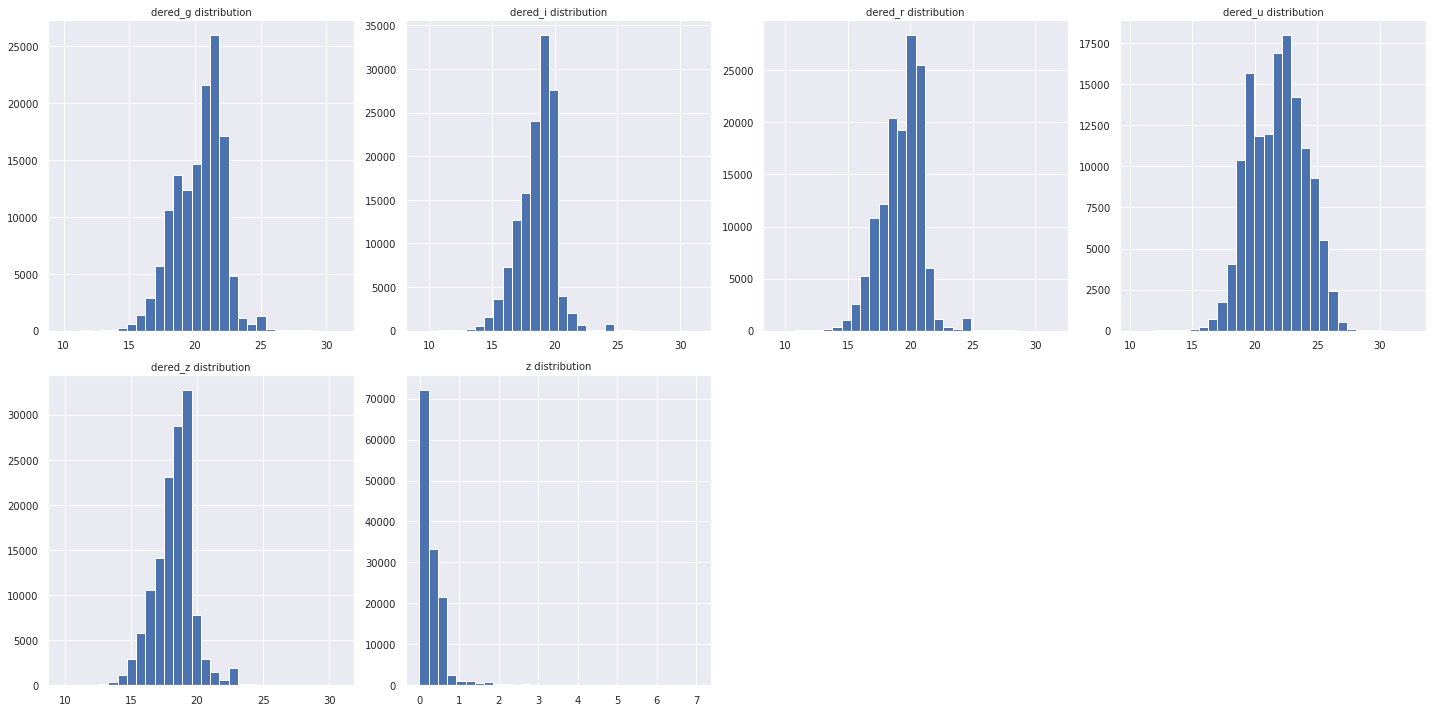

In [11]:
#Histograms of the columns in the dataset
hist_plots(data=data_clean,
          rows=2,
          cols=4,
          figsize=(20,10))


Mostly normal distributions of the bands around 18-20 mag. Most redshifts are less than 0.5.

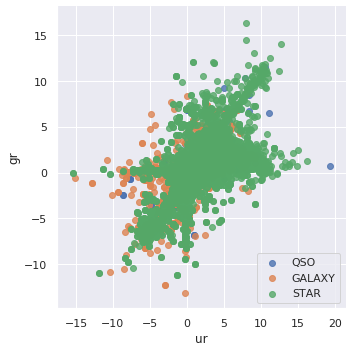

In [12]:

data['ur'] =  data['dered_u'] - data['dered_r']
data['gr'] =  data['dered_g'] - data['dered_r']

sns.lmplot( x="ur", y="gr", data=data, fit_reg=False, hue='class', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

As seen by the graph above, colours (the difference in magnitude between 2 bands) gives no extra information.

In [13]:
# Creating the atributes set as X and the target redshift as y
from sklearn.preprocessing import MinMaxScaler
cols= data_clean.columns[:-1]
X = data_clean[cols]
y = data_clean['z']
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X)

## Training models

In [14]:
# Splitting the Xand y datasets into training and test set and normalising the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t, y, 
                                                    test_size=0.3, random_state=42)

In [15]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()


LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)}))


In [16]:
error_df

[train    0.221162
 test     0.237769
 dtype: float64]

In [17]:
# Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
RF = RandomForestRegressor(random_state = 42)
param_grid = {  'bootstrap': [True],
                'max_features': ['log2'], 
                'n_estimators': range(300,400, 20)}

rf= GridSearchCV(RF,
                  param_grid=param_grid)

# Train the model on training data
rf.fit(X_train, y_train);
predictions = rf.predict(X_test)


In [18]:
rf.best_params_ ,rf.best_score_

({'bootstrap': True, 'max_features': 'log2', 'n_estimators': 360},
 0.6035668644692928)

'bootstrap': True, 'max_features': 'log2', 'n_estimators': 121 best parameters of the random forest regressor. 

In [19]:
# Print out the mean square error between the predicted redshift and the spectroscopic redshift
print('Mean Square Error RF:', round(mean_squared_error(y_test, predictions), 3))

Mean Square Error RF: 0.091


In [20]:
# MSE between the SDSS photo redshift and the spectroscopic redshift
sZ= data.loc[(data['photoZ'] >= 0.0)]['z']
print('Mean Square Error SDSS:', round(mean_squared_error(sZ,photoz), 3))

Mean Square Error SDSS: 0.259


The test error of the linear regression model is (mse) 0.23 while we get an mse of 0.075 with randome forest classifier. To compare errors the mse from the difference between photometric redshift and spectroscopic redshift is 0.259.

In [22]:
X_test = pd.DataFrame(X_test)
index = pd.DataFrame(index=X_test.index)
errors = index.join(data, how= 'inner')
prediction = pd.DataFrame(predictions, columns = ['pred'])
errors['pred'] = predictions
errors['pred_err'] = abs(errors['pred'] - errors['z'])

errors.head()


,objID,dered_u,err_u,dered_g,err_g,dered_r,err_r,dered_i,err_i,dered_z,...,zErr,photoZ,photoErr,class,subClass,type,ur,gr,pred,pred_err
0,1237648673971437623,16.21378,0.009347,14.63972,0.002319,13.82659,0.002071,13.42598,0.002083,13.11843,...,0.000011,0.024331,0.006740,GALAXY,STARFORMING,NaN,2.38719,0.81313,0.414930,0.402417
1,1237648704023625805,20.21892,0.115816,24.91980,2.818639,17.53619,0.008782,17.03932,0.008234,16.88227,...,0.000008,-9999.000000,-9999.000000,GALAXY,STARFORMING,NaN,2.68273,7.38361,0.365634,0.267371
2,1237648704023625805,20.21892,0.115816,24.91980,2.818639,17.53619,0.008782,17.03932,0.008234,16.88227,...,0.000010,-9999.000000,-9999.000000,GALAXY,STARFORMING,NaN,2.68273,7.38361,0.397308,0.299070
3,1237648704579437220,22.93833,0.825781,21.15927,0.084720,19.41586,0.028193,18.46311,0.017802,18.04901,...,0.000119,0.507916,0.015943,GALAXY,NaN,NaN,3.52247,1.74341,0.213705,0.290389
4,1237648704579502224,19.89147,0.056597,18.27204,0.008137,17.39907,0.006014,16.98018,0.005779,16.66573,...,0.000031,0.118370,0.024215,GALAXY,NaN,NaN,2.49240,0.87297,0.007419,0.099797


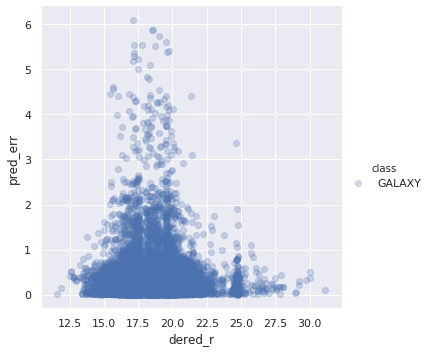

In [23]:
# plot of dered_r versus the absolute error of predicted redshift and spectroscopic redshif (pred_err)
sns.lmplot( x="dered_r", y="pred_err", data=errors, fit_reg=False, hue='class',scatter_kws={'alpha':0.25})
plt.show()

There doesn't seem to be a correlation between the absolute error of predicted redshift and spectroscopic redshif (pred_err) andthe r band. There does seem to be a fraction of galaxies with high pred_err, all around magnitude 20 

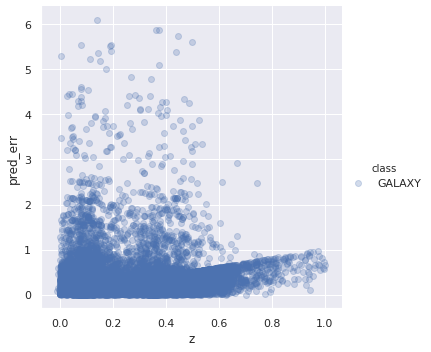

In [24]:
# Scatter plot of the redshift with the pred_err for the 3 classes (star, galaxies and QSO)
sns.lmplot( x="z", y="pred_err", data=errors, fit_reg=False, hue = 'class', scatter_kws={'alpha':0.25})

There is a correlation of some sources with higher redshift, the higher the pred_err.  

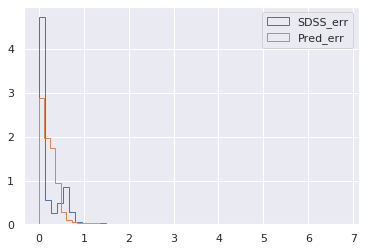

In [25]:
# histograms of the absolute errors for the predicted redshift and the photometric redshift.
plt.hist(abs(photoz-sZ), bins=50,density =True,histtype= 'step')
plt.hist(errors['pred_err'], bins=50, density = True,histtype= 'step')
labels= ["SDSS_err", "Pred_err"]
plt.legend(labels)
plt.show()

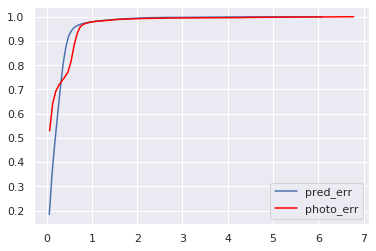

In [26]:
# getting data of the histogram
count, bins_count = np.histogram(errors['pred_err'], bins=100)
count2, bins_count2 = np.histogram(abs(photoz-sZ), bins=100) 
# finding the PDF of the histogram using count values
pdf = count / sum(count)
pdf_photo = count2 / sum(count2)
# using numpy np.cumsum to calculate the CDF
cdf = np.cumsum(pdf)
cdf_photo =  np.cumsum(pdf_photo)
# plotting PDF and CDF

plt.plot(bins_count[1:], cdf, label="pred_err")
plt.plot(bins_count2[1:], cdf_photo, color="red", label="photo_err")
plt.legend()

Both the histogram and the cumulative plots show that the RF predicted errors do better than the photometric errors.


## Conclusion

For the 135,000 sources in this dataset with the same number of of sources per class, the mse between the predicted redshift and the spectroscopic redshift(pred_err) is 0.091; much less than the mse between the SDSS photometric errors and the spectroscopic errors of 0.259. 

It was also observed that the pred_err was not correlated with the r band. But it was observed that a small fraction of galaxies with an r band magnitude of about 20, have high errors.

There was some correlation at high redshifht (z > 1). This represent a very small subset of the entire dataset. Need to check if the errors would be as high if they were better rappresented in the dataset.

